In [138]:
# Constants
DATA_PATH = "../dataset/survey_results_public.csv"
EXPORT_PATH = "../dataset/Cleand_Data.pkl"
NEEDED_FEATURES = ["DevType","LanguageWorkedWith","DatabaseWorkedWith","WebframeWorkedWith","MiscTechWorkedWith",
                  "LanguageDesireNextYear","DatabaseDesireNextYear","WebframeDesireNextYear","MiscTechDesireNextYear"]

In [55]:
# Load Packages
import pandas as pd
from sklearn.preprocessing import MultiLabelBinarizer
import seaborn as sns
import matplotlib.pyplot as plt
pd.options.display.max_rows = 10000

# Functions

In [3]:
def split_answers(x):
    # if type(x) == float is for handling the null values.
    # because the type of null values is float
    if type(x) == float:
        return []
    else:
        return x.split(";")

# Reading Data

In [4]:
df = pd.read_csv(DATA_PATH)

In [5]:
df.head()

Respondent                                         MainBranch Hobbyist  \
0           1                     I am a developer by profession      Yes   
1           2                     I am a developer by profession       No   
2           3                        I code primarily as a hobby      Yes   
3           4                     I am a developer by profession      Yes   
4           5  I used to be a developer by profession, but no...      Yes   

    Age Age1stCode CompFreq  CompTotal  ConvertedComp             Country  \
0   NaN         13  Monthly        NaN            NaN             Germany   
1   NaN         19      NaN        NaN            NaN      United Kingdom   
2   NaN         15      NaN        NaN            NaN  Russian Federation   
3  25.0         18      NaN        NaN            NaN             Albania   
4  31.0         16      NaN        NaN            NaN       United States   

     CurrencyDesc  ...                  SurveyEase           SurveyLength  \
0   European Euro  ...  Neither easy nor difficult  Appropriate in length   
1  Pound sterling  ...                         NaN                    NaN   
2             NaN  ...  Neither easy nor difficult  Appropriate in length   
3    Albanian lek  ...                         NaN                    NaN   
4             NaN  ...                        Easy              Too short   

  Trans                                     UndergradMajor  \
0    No  Computer science, computer engineering, or sof...   
1   NaN  Computer science, computer engineering, or sof...   
2   NaN                                                NaN   
3    No  Computer science, computer engineering, or sof...   
4    No  Computer science, computer engineering, or sof...   

  WebframeDesireNextYear    WebframeWorkedWith  \
0           ASP.NET Core  ASP.NET;ASP.NET Core   
1                    NaN                   NaN   
2                    NaN                   NaN   
3                    NaN                   NaN   
4   Django;Ruby on Rails         Ruby on Rails   

                              WelcomeChange WorkWeekHrs YearsCode YearsCodePro  
0   Just as welcome now as I felt last year        50.0        36           27  
1  Somewhat more welcome now than last year         NaN         7            4  
2  Somewhat more welcome now than last year         NaN         4          NaN  
3  Somewhat less welcome now than last year        40.0         7            4  
4   Just as welcome now as I felt last year         NaN        15            8  

[5 rows x 61 columns]

In [7]:
needed_df = df[NEEDED_FEATURES]
needed_df.head()

DevType  \
0  Developer, desktop or enterprise applications;...   
1            Developer, full-stack;Developer, mobile   
2                                                NaN   
3                                                NaN   
4                                                NaN   

         LanguageWorkedWith                         DatabaseWorkedWith  \
0    C#;HTML/CSS;JavaScript  Elasticsearch;Microsoft SQL Server;Oracle   
1          JavaScript;Swift                                        NaN   
2  Objective-C;Python;Swift                                        NaN   
3                       NaN                                        NaN   
4         HTML/CSS;Ruby;SQL              MySQL;PostgreSQL;Redis;SQLite   

     WebframeWorkedWith MiscTechWorkedWith    LanguageDesireNextYear  \
0  ASP.NET;ASP.NET Core     .NET;.NET Core    C#;HTML/CSS;JavaScript   
1                   NaN       React Native              Python;Swift   
2                   NaN                NaN  Objective-C;Python;Swift   
3                   NaN                NaN                       NaN   
4         Ruby on Rails            Ansible           Java;Ruby;Scala   

  DatabaseDesireNextYear WebframeDesireNextYear  \
0   Microsoft SQL Server           ASP.NET Core   
1                    NaN                    NaN   
2                    NaN                    NaN   
3                    NaN                    NaN   
4       MySQL;PostgreSQL   Django;Ruby on Rails   

             MiscTechDesireNextYear  
0                 .NET Core;Xamarin  
1  React Native;TensorFlow;Unity 3D  
2                               NaN  
3                               NaN  
4                      Ansible;Chef

In [8]:
needed_df.shape

(64461, 9)

# Splitting multiple answers

In [13]:
cols = needed_df.columns.tolist()
for col in cols:
    needed_df[col] = needed_df[col].apply(split_answers)

needed_df.head()

C:\Users\mohamed\AppData\Local\Temp/ipykernel_23028/2494993181.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  needed_df[col] = needed_df[col].apply(split_answers)


DevType  \
0  [Developer, desktop or enterprise applications...   
1         [Developer, full-stack, Developer, mobile]   
2                                                 []   
3                                                 []   
4                                                 []   

             LanguageWorkedWith  \
0    [C#, HTML/CSS, JavaScript]   
1           [JavaScript, Swift]   
2  [Objective-C, Python, Swift]   
3                            []   
4         [HTML/CSS, Ruby, SQL]   

                              DatabaseWorkedWith       WebframeWorkedWith  \
0  [Elasticsearch, Microsoft SQL Server, Oracle]  [ASP.NET, ASP.NET Core]   
1                                             []                       []   
2                                             []                       []   
3                                             []                       []   
4             [MySQL, PostgreSQL, Redis, SQLite]          [Ruby on Rails]   

  MiscTechWorkedWith        LanguageDesireNextYear  DatabaseDesireNextYear  \
0  [.NET, .NET Core]    [C#, HTML/CSS, JavaScript]  [Microsoft SQL Server]   
1     [React Native]               [Python, Swift]                      []   
2                 []  [Objective-C, Python, Swift]                      []   
3                 []                            []                      []   
4          [Ansible]           [Java, Ruby, Scala]     [MySQL, PostgreSQL]   

    WebframeDesireNextYear                MiscTechDesireNextYear  
0           [ASP.NET Core]                  [.NET Core, Xamarin]  
1                       []  [React Native, TensorFlow, Unity 3D]  
2                       []                                    []  
3                       []                                    []  
4  [Django, Ruby on Rails]                       [Ansible, Chef]

# One Hot Encode
### for converting the list of multiple answers  into new features

In [27]:
cols = needed_df.columns.tolist()[:5]
encoded_dfs = {}
for col in cols:
    binarizer = MultiLabelBinarizer()
    encoded_df = pd.DataFrame(data=binarizer.fit_transform(needed_df[col]),
                             columns=binarizer.classes_,
                             index=needed_df[col].index)
    encoded_dfs[col] = encoded_df


In [28]:
needed_df = pd.concat(encoded_dfs, axis=1)
needed_df.head()

DevType                           \
  Academic researcher Data or business analyst   
0                   0                        0   
1                   0                        0   
2                   0                        0   
3                   0                        0   
4                   0                        0   

                                                                        \
  Data scientist or machine learning specialist Database administrator   
0                                             0                      0   
1                                             0                      0   
2                                             0                      0   
3                                             0                      0   
4                                             0                      0   

                                                                        \
  Designer DevOps specialist Developer, QA or test Developer, back-end   
0        0                 0                     0                   0   
1        0                 0                     0                   0   
2        0                 0                     0                   0   
3        0                 0                     0                   0   
4        0                 0                     0                   0   

                                                 \
  Developer, desktop or enterprise applications   
0                                             1   
1                                             0   
2                                             0   
3                                             0   
4                                             0   

                                               ... MiscTechWorkedWith         \
  Developer, embedded applications or devices  ...            Node.js Pandas   
0                                           0  ...                  0      0   
1                                           0  ...                  0      0   
2                                           0  ...                  0      0   
3                                           0  ...                  0      0   
4                                           0  ...                  0      0   

                                                                  \
  Puppet React Native TensorFlow Teraform Torch/PyTorch Unity 3D   
0      0            0          0        0             0        0   
1      0            1          0        0             0        0   
2      0            0          0        0             0        0   
3      0            0          0        0             0        0   
4      0            0          0        0             0        0   

                         
  Unreal Engine Xamarin  
0             0       0  
1             0       0  
2             0       0  
3             0       0  
4             0       0  

[5 rows x 97 columns]

In [37]:
needed_df.isnull().sum()

DevType             Academic researcher                              0
                    Data or business analyst                         0
                    Data scientist or machine learning specialist    0
                    Database administrator                           0
                    Designer                                         0
                    DevOps specialist                                0
                    Developer, QA or test                            0
                    Developer, back-end                              0
                    Developer, desktop or enterprise applications    0
                    Developer, embedded applications or devices      0
                    Developer, front-end                             0
                    Developer, full-stack                            0
                    Developer, game or graphics                      0
                    Developer, mobile                                0
      

In [74]:
needed_df["DevType"].sum()

Academic researcher                               3552
Data or business analyst                          4024
Data scientist or machine learning specialist     3988
Database administrator                            5722
Designer                                          5321
DevOps specialist                                 5969
Developer, QA or test                             3947
Developer, back-end                              27228
Developer, desktop or enterprise applications    11784
Developer, embedded applications or devices       4750
Developer, front-end                             18296
Developer, full-stack                            27125
Developer, game or graphics                       2789
Developer, mobile                                 9482
Educator                                          2928
Engineer, data                                    3738
Engineer, site reliability                        1940
Engineering manager                               2724
Marketing 

# Dropping some tracks
### dropping some tracks that can confuse the model

In [75]:
exclude_tracks = ['Designer', 'Educator', 'Marketing or sales professional', 'Engineering manager',
                 'Product manager', 'Senior executive/VP', "Engineer, site reliability"]

for track in exclude_tracks:
    needed_df = needed_df.drop(("DevType", track), axis=1)

In [76]:
needed_df["DevType"].sum()

Academic researcher                               3552
Data or business analyst                          4024
Data scientist or machine learning specialist     3988
Database administrator                            5722
DevOps specialist                                 5969
Developer, QA or test                             3947
Developer, back-end                              27228
Developer, desktop or enterprise applications    11784
Developer, embedded applications or devices       4750
Developer, front-end                             18296
Developer, full-stack                            27125
Developer, game or graphics                       2789
Developer, mobile                                 9482
Engineer, data                                    3738
Scientist                                         2086
System administrator                              5242
dtype: int64

# Filtering the Data

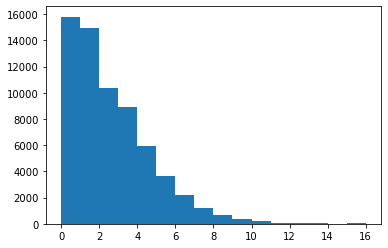

In [89]:
number_of_selected_tracks = needed_df[NEEDED_FEATURES[0]].sum(axis=1)
plt.hist(number_of_selected_tracks, number_of_selected_tracks.max())
plt.show()

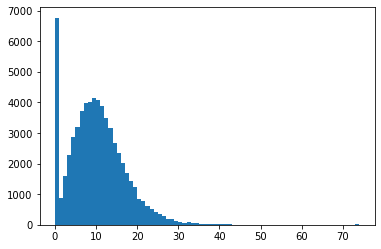

In [91]:
number_of_selected_skills = needed_df[NEEDED_FEATURES[1:5]].sum(axis=1)
plt.hist(number_of_selected_skills, number_of_selected_skills.max())
plt.show()

In [92]:
#the observation of the filter:
TRACKS_RANGE = [1,2]
SKILLS_RANGE = [3,12]

In [94]:
track_mask = (number_of_selected_tracks >= TRACKS_RANGE[0]) & (number_of_selected_tracks <= TRACKS_RANGE[1])
skill_mask = (number_of_selected_skills >= SKILLS_RANGE[0]) & (number_of_selected_skills <= SKILLS_RANGE[1])
filter_mask = track_mask & skill_mask

In [96]:
needed_df = needed_df.loc[filter_mask]

In [122]:
needed_df

DevType                           \
      Academic researcher Data or business analyst   
0                       0                        0   
1                       0                        0   
5                       0                        0   
8                       0                        0   
11                      0                        0   
...                   ...                      ...   
64405                   0                        0   
64416                   0                        1   
64422                   0                        0   
64428                   0                        0   
64447                   0                        0   

                                                                            \
      Data scientist or machine learning specialist Database administrator   
0                                                 0                      0   
1                                                 0                      0   
5                                                 0                      0   
8                                                 0                      0   
11                                                0                      0   
...                                             ...                    ...   
64405                                             0                      0   
64416                                             0                      0   
64422                                             0                      0   
64428                                             0                      0   
64447                                             0                      0   

                                                                   \
      DevOps specialist Developer, QA or test Developer, back-end   
0                     0                     0                   0   
1                     0                     0                   0   
5                     0                     0                   0   
8                     0                     0                   0   
11                    0                     0                   0   
...                 ...                   ...                 ...   
64405                 0                     1                   0   
64416                 0                     0                   0   
64422                 0                     0                   1   
64428                 0                     0                   0   
64447                 0                     0                   1   

                                                     \
      Developer, desktop or enterprise applications   
0                                                 1   
1                                                 0   
5                                                 0   
8                                                 0   
11                                                0   
...                                             ...   
64405                                             0   
64416                                             0   
64422                                             0   
64428                                             0   
64447                                             0   

                                                                        ...  \
      Developer, embedded applications or devices Developer, front-end  ...   
0                                               0                    0  ...   
1                                               0                    0  ...   
5                                               0                    1  ...   
8                                               0                    0  ...   
11                                              0                    1  ...   
...                                           ...                  ...  ...   
64405                                           0     

# Dealing with Imbalanced Classes

In [123]:
track_df = needed_df["DevType"].copy()
track_df.sum()

Academic researcher                               581
Data or business analyst                          669
Data scientist or machine learning specialist     799
Database administrator                            296
DevOps specialist                                 677
Developer, QA or test                             493
Developer, back-end                              5503
Developer, desktop or enterprise applications    1671
Developer, embedded applications or devices       795
Developer, front-end                             2890
Developer, full-stack                            5578
Developer, game or graphics                       342
Developer, mobile                                1859
Engineer, data                                    483
Scientist                                         292
System administrator                              440
dtype: int64

In [124]:
samples_per_class = 500
resampled_tracks = []

for col in track_df.columns:
    sub_df = track_df.loc[track_df[col] == 1].copy()
    
    if len(sub_df) < samples_per_class:
        # Upsample
        sub_df = sub_df.sample(samples_per_class, replace=True, random_state=0)
    else:
        # Downsample
        sub_df = sub_df.sample(samples_per_class, random_state=0) 
    
    resampled_tracks.append(sub_df)

In [125]:
track_df  = pd.concat(resampled_tracks)
len(track_df)

8000

In [126]:
track_df.sum()

Academic researcher                               797
Data or business analyst                          767
Data scientist or machine learning specialist     871
Database administrator                            588
DevOps specialist                                 705
Developer, QA or test                             590
Developer, back-end                              1770
Developer, desktop or enterprise applications     892
Developer, embedded applications or devices       666
Developer, front-end                              893
Developer, full-stack                            1431
Developer, game or graphics                       560
Developer, mobile                                 800
Engineer, data                                    631
Scientist                                         642
System administrator                              647
dtype: int64

In [127]:
needed_df = needed_df.loc[track_df.index]
needed_df

DevType                           \
      Academic researcher Data or business analyst   
54451                   1                        0   
37550                   1                        0   
49646                   1                        0   
47422                   1                        1   
5139                    1                        0   
45254                   1                        0   
26773                   1                        0   
47918                   1                        0   
17824                   1                        1   
34042                   1                        0   
10521                   1                        0   
47046                   1                        0   
30002                   1                        0   
20820                   1                        0   
35822                   1                        0   
19109                   1                        0   
30893                   1                        0   
55299                   1                        0   
2727                    1                        0   
50588                   1                        0   
35952                   1                        0   
51746                   1                        0   
55361                   1                        0   
19305                   1                        0   
5582                    1                        0   
25477                   1                        0   
31072                   1                        0   
9863                    1                        0   
14114                   1                        0   
23944                   1                        1   
10462                   1                        0   
51455                   1                        0   
54480                   1                        0   
23656                   1                        0   
52590                   1                        0   
4474                    1                        0   
64142                   1                        0   
30665                   1                        0   
23187                   1                        0   
52                      1                        0   
18574                   1                        0   
40888                   1                        0   
47969                   1                        0   
26496                   1                        0   
46106                   1                        0   
32459                   1                        1   
7174                    1                        0   
12662                   1                        0   
1571                    1                        0   
46980                   1                        0   
15967                   1                        0   
49817                   1                        0   
51421                   1                        0   
13123                   1                        0   
26176                   1                        0   
3799                    1                        0   
53809                   1                        0   
26072                   1                        0   
41835                   1                        0   
4592                    1                        0   
1812                    1                        0   
57423                   1                        0   
56667                   1                        0   
34763                   1                        0   
17447                   1                        0   
26936                   1                        0   
50154                   1                        0   
23226                   1                        0   
36057                   1                        0   
56555                   1                        0   
1823                    1                        0   
54598                   1                        0   
58602                 

In [128]:
needed_df.shape

(8000, 90)

In [139]:
needed_df.to_pickle(EXPORT_PATH)